# Preliminary operations

## Import dependencies

### Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import re
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Cleaning text

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"We're", "We are", text)
    text = re.sub(r"That's", "That is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"Can't", "Cannot", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"don\x89Ûªt", "do not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"There's", "There is", text)
    text = re.sub(r"He's", "He is", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"You're", "You are", text)
    text = re.sub(r"I'M", "I am", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"i'm", "I am", text)
    text = re.sub(r"I\x89Ûªm", "I am", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"Isn't", "is not", text)
    text = re.sub(r"Here's", "Here is", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"you\x89Ûªve", "you have", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"it\x89Ûªs", "it is", text)
    text = re.sub(r"doesn\x89Ûªt", "does not", text)
    text = re.sub(r"It\x89Ûªs", "It is", text)
    text = re.sub(r"Here\x89Ûªs", "Here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"I\x89Ûªve", "I have", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"can\x89Ûªt", "cannot", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"We've", "We have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"Y'all", "You all", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"Didn't", "Did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"DON'T", "DO NOT", text)
    text = re.sub(r"That\x89Ûªs", "That is", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"You\x89Ûªre", "You are", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"Don\x89Ûªt", "Do not", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"They're", "They are", text)
    text = re.sub(r"Can\x89Ûªt", "Cannot", text)
    text = re.sub(r"you\x89Ûªll", "you will", text)
    text = re.sub(r"I\x89Ûªd", "I would", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"I've", "I have", text)
    text = re.sub(r"Don't", "do not", text)
    text = re.sub(r"I'll", "I will", text)
    text = re.sub(r"I'd", "I would", text)
    text = re.sub(r"Let's", "Let us", text)
    text = re.sub(r"you'd", "You would", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"Ain't", "am not", text)
    text = re.sub(r"Haven't", "Have not", text)
    text = re.sub(r"Could've", "Could have", text)
    text = re.sub(r"youve", "you have", text)
    text = re.sub(r"donå«t", "do not", text)
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = text.strip(' ')
    return text

# Dataset

## CSV

In [ ]:
base_path = '/content/drive/My Drive/AML_Progetto/dataset/'

train_csv_name = 'train.csv'
test_csv_name = 'test_merged.csv'
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

### Train

In [ ]:
train_csv_path = os.path.join(base_path, train_csv_name)
data = pd.read_csv(train_csv_path)

In [ ]:
len(data)

159571

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Test

In [ ]:
test_csv_path = os.path.join(base_path, test_csv_name)
test_df = pd.read_csv(test_csv_path)
test_labels = test_df[label_columns].values

In [ ]:
len(test_df)

63978

In [ ]:
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


## Lower case

In [ ]:
data["comment_text"] = data["comment_text"].str.lower()
test_df["comment_text"] = test_df["comment_text"].str.lower()

## Clean dataset

In [ ]:
data['comment_text'] = data['comment_text'].map(lambda com : clean_text(com))
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))
test_texts = test_df['comment_text']
dataframe = data

## Split train

In [ ]:
# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
	dataframe['comment_text'], dataframe.iloc[:, 2:], test_size=0.25, random_state=42)

# Tokenization and Encoding

## Define tokenizer function

In [ ]:
# Token and Encode Function
def tokenize_and_encode(tokenizer, comments, labels, max_length=120):
	# Initialize empty lists to store tokenized inputs and attention masks
	input_ids = []
	attention_masks = []

	# Iterate through each comment in the 'comments' list
	for comment in comments:
		# Tokenize and encode the comment using the BERT tokenizer
		encoded_dict = tokenizer.encode_plus(
			comment,
			# Add special tokens like [CLS] and [SEP]
			add_special_tokens=True,
			# Truncate or pad the comment to 'max_length'
			max_length=max_length,
			# Pad the comment to 'max_length' with zeros if needed
			pad_to_max_length=True,
			# Return attention mask to mask padded tokens
			return_attention_mask=True,
			# Return PyTorch tensors
			return_tensors='pt'
		)

		# Append the tokenized input and attention mask to their respective lists
		input_ids.append(encoded_dict['input_ids'])
		attention_masks.append(encoded_dict['attention_mask'])

	# Concatenate the tokenized inputs and attention masks into tensors
	input_ids = torch.cat(input_ids, dim=0)
	attention_masks = torch.cat(attention_masks, dim=0)
	# Convert the labels to a PyTorch tensor with the data type float32
	labels = torch.tensor(labels, dtype=torch.float32)
	# Return the tokenized inputs, attention masks, and labels as PyTorch tensors
	return input_ids, attention_masks, labels

## Initialize tokenizer

crea un tokenizzatore BERT basato sul modello 'bert-base-uncased'

In [ ]:
# Specifies the new dimension of the vocabulary.
new_vocab_size = 4000
# Load the configuration of BERT
config = BertConfig.from_pretrained('bert-base-uncased')
# Change the size of the vocabulary in the configuration.
config.vocab_size = new_vocab_size
# Token initialization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, config=config)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# BERT

## Model initialization

In [ ]:
# Model Initialization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
													num_labels=6)

# Move model to GPU if available
device = torch.device(
	'cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Apply tokenization

In [ ]:
# Tokenize and Encode the comments and labels for the training set
input_ids, attention_masks, labels = tokenize_and_encode(
	tokenizer,
	train_texts,
	train_labels.values,
)

# Tokenize and Encode the comments and labels for the test set
test_input_ids, test_attention_masks, test_labels = tokenize_and_encode(
	tokenizer,
	test_texts,
	test_labels
)

# Tokenize and Encode the comments and labels for the validation set
val_input_ids, val_attention_masks, val_labels = tokenize_and_encode(
	tokenizer,
	val_texts,
	val_labels.values
)

print('Training Comments :',train_texts.shape)
print('Input Ids		 :',input_ids.shape)
print('Attention Mask :',attention_masks.shape)
print('Labels		 :',labels.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Training Comments : (119678,)
Input Ids		 : torch.Size([119678, 120])
Attention Mask : torch.Size([119678, 120])
Labels		 : torch.Size([119678, 6])


## Data Loaders

In [ ]:
# Creating Pytorch DataLoader for the balanced dataset
batch_size = 32
train_dataset = TensorDataset(input_ids, attention_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# testing set
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# validation set
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Optimizer

In [ ]:
# Optimizer setup
optimizer = AdamW(model.parameters(), lr=2e-5)

## Model training

In [ ]:
start_time = time.time()

#saves the loss values to plot them later
tot_train_loss = []
tot_val_loss = []

# Function to Train the Model
def train_model(model, train_loader, optimizer, device, num_epochs):
	# Loop through the specified number of epochs
	for epoch in range(num_epochs):
		# Set the model to training mode
		model.train()
		# Initialize total loss for the current epoch
		total_loss = 0

		# Loop through the batches in the training data
		for batch in train_loader:
			input_ids, attention_mask, labels = [t.to(device) for t in batch]

			optimizer.zero_grad()

			outputs = model(
				input_ids, attention_mask=attention_mask, labels=labels)
			loss = outputs.loss
			total_loss += loss.item()

			loss.backward()
			optimizer.step()

		# Validation phase
		model.eval() # Set the model to evaluation mode
		val_loss = 0

		# Disable gradient computation during validation
		with torch.no_grad():
			for batch in val_loader:
				input_ids, attention_mask, labels = [
					t.to(device) for t in batch]
				outputs = model(
					input_ids, attention_mask=attention_mask, labels=labels)
				loss = outputs.loss
				val_loss += loss.item()

		# Print the average loss for the current epoch
		print(f'Epoch {epoch+1} of {num_epochs}, Training Loss: {(total_loss/len(train_loader)):.4f}, Validation loss:{(val_loss/len(val_loader)):.4f}')

		# Update loss values
		tot_train_loss.append(total_loss/len(train_loader))
		tot_val_loss.append(val_loss/len(val_loader))

# Call the function to train the model
train_model(model, train_loader, optimizer, device, num_epochs=3)
end_time = time.time()
elapsed_time = end_time - start_time

Epoch 1 of 3, Training Loss: 0.0538, Validation loss:0.0412
Epoch 2 of 3, Training Loss: 0.0346, Validation loss:0.0399
Epoch 3 of 3, Training Loss: 0.0276, Validation loss:0.0413


### Loss plot

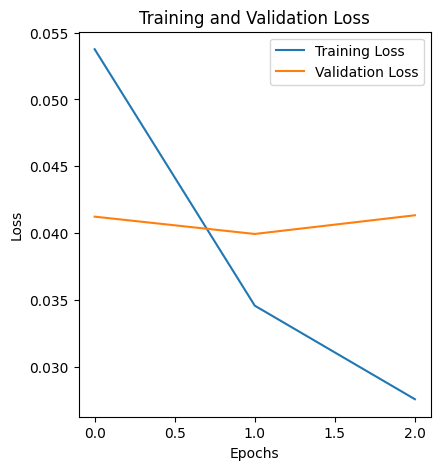

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tot_train_loss, label='Training Loss')
plt.plot(tot_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

## Model evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

def evaluate_model_per_class(model, test_loader, device):
    model.eval()  # Imposta il modello in modalità valutazione

    true_labels = []
    predicted_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [t.to(device) for t in batch]

            # Ottieni le previsioni del modello
            outputs = model(input_ids, attention_mask=attention_mask)
            # Usa sigmoid per la classificazione multiclasse
            predicted_probs_batch = torch.sigmoid(outputs.logits)
            predicted_probs.append(predicted_probs_batch.cpu().numpy())

            true_labels_batch = labels.cpu().numpy()
            true_labels.append(true_labels_batch)

    # Combina previsioni e etichette per la valutazione
    true_labels = np.concatenate(true_labels, axis=0)
    predicted_probs = np.concatenate(predicted_probs, axis=0)
    predicted_labels = (predicted_probs > 0.5).astype(int)  # Applica la soglia per la classificazione binaria

    # Calcola le metriche di valutazione per ogni classe
    precision_per_class = precision_score(true_labels, predicted_labels, average=None)
    recall_per_class = recall_score(true_labels, predicted_labels, average=None)
    f1_per_class = f1_score(true_labels, predicted_labels, average=None)

    # Stampa le metriche di valutazione per ogni classe
    print("Metriche di valutazione per ogni classe:")
    for i in range(len(precision_per_class)):
        print(f"Classe {i}:")
        print(f'Precision: {precision_per_class[i]:.4f}')
        print(f'Recall: {recall_per_class[i]:.4f}')
        print(f'F1-score: {f1_per_class[i]:.4f}')
        print()

    # Puoi anche stampare una report completo con classification_report
    print("Report di classificazione completo:")
    print(classification_report(true_labels, predicted_labels))
    print(f'Elapsed time: {elapsed_time:.2f} seconds')

# Chiama la funzione per valutare il modello sui dati di test
evaluate_model_per_class(model, test_loader, device)

Metriche di valutazione per ogni classe:
Classe 0:
Precision: 0.5339
Recall: 0.9084
F1-score: 0.6725

Classe 1:
Precision: 0.2750
Recall: 0.6894
F1-score: 0.3932

Classe 2:
Precision: 0.6335
Recall: 0.7895
F1-score: 0.7029

Classe 3:
Precision: 0.4239
Recall: 0.8057
F1-score: 0.5556

Classe 4:
Precision: 0.6483
Recall: 0.7397
F1-score: 0.6910

Classe 5:
Precision: 0.5783
Recall: 0.6222
F1-score: 0.5995

Report di classificazione completo:
              precision    recall  f1-score   support

           0       0.53      0.91      0.67      6090
           1       0.28      0.69      0.39       367
           2       0.63      0.79      0.70      3691
           3       0.42      0.81      0.56       211
           4       0.65      0.74      0.69      3427
           5       0.58      0.62      0.60       712

   micro avg       0.57      0.82      0.67     14498
   macro avg       0.52      0.76      0.60     14498
weighted avg       0.58      0.82      0.67     14498
 samples avg   

# Save the Model

In [ ]:
# Save the tokenizer and model in the same directory
#output_dir = "Saved_model"
output_dir = '/content/drive/MyDrive/Progetto AML notebook/Saved_model'
# Save model's state dictionary and configuration
model.save_pretrained(output_dir)
# Save tokenizer's configuration and vocabulary
#tokenizer.save_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# Salva solo il tokenizer (non la configurazione del modello)
tokenizer.save_pretrained(output_dir)


('/content/drive/MyDrive/Progetto AML notebook/Saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/Progetto AML notebook/Saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/Progetto AML notebook/Saved_model/vocab.txt',
 '/content/drive/MyDrive/Progetto AML notebook/Saved_model/added_tokens.json')

# Load the model

In [ ]:
drive.mount('/content/drive')
device = torch.device(
	'cuda') if torch.cuda.is_available() else torch.device('cpu')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the tokenizer and model from the saved directory
output_dir = '/content/drive/MyDrive/Progetto AML notebook/Saved_model'
Bert_Tokenizer = BertTokenizer.from_pretrained(output_dir)
Bert_Model = BertForSequenceClassification.from_pretrained(
	output_dir).to(device)